# Central limit theorem (CLT), chi-square goodness-of-fit test

References:

- CLT: Bendat and Piersol section 3.3.1

- chi-square test: Bendat and Piersol section 4.5.1

In [1]:
import numpy as np
import xarray as xr

%matplotlib inline
import matplotlib.pyplot as plt

from xhistogram.xarray import histogram

import sstats.tseries as ts
import sstats as ss

In [2]:
from dask.distributed import Client, LocalCluster
#
cluster = LocalCluster()
#
#from dask_jobqueue import PBSCluster
#cluster = PBSCluster()
#w = cluster.scale(28*1)
#
client = Client(cluster)
client

/Users/aponte/.miniconda3/envs/equinox/lib/python3.7/site-packages/distributed/node.py:244: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55532 instead
  http_address["port"], self.http_server.port


Client Scheduler: tcp://127.0.0.1:55533 Dashboard: http://127.0.0.1:55532/status,Cluster Workers: 4 Cores: 4 Memory: 17.18 GB


---

## Central limit theorem

This theorem states that the sum of mutually independent random variables whose distributions may differ will converge toward a normal distribution as the number of variables grows.
The mean and standard deviations are related to that of each individual variables:

$
\begin{align}
x &= \sum_{i=1,N} a_i x_i, \\
\mu_x &= E [ x  = \sum_{i=1,N} a_i E [x_i] = \sum_{i=1,N} a_i \mu_i, \\
\sigma_x^2 &= E\big [ (x-\mu)^2 \big ] = \sum_{i=1,N} a_i^2 \sigma_i^2
\end{align}
$

where $a_i$ are fixed constants and all other notations should be straighforwardly understood.



In [46]:
N = int(1e5)
x = (ts.binomial(21, draws=N, name='x')
     .cumsum('time')
    )
x = x/(x.time+1.)
x = x.rename('x')

In [47]:
bins = np.arange(-.1,1.3,.1)
x_pdf = (histogram(x, bins=[bins], dim=['draw'], density=True)
         .isel(time=slice(0,None,5))
        )

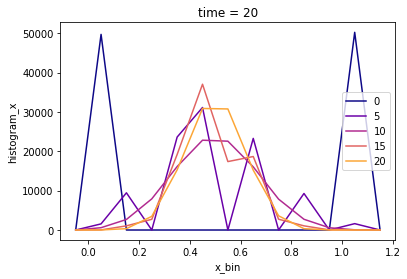

In [48]:
fig, ax = plt.subplots(1,1)
colors = ss.get_cmap_colors(x_pdf.time.size)
for t, c in zip(x_pdf.time, colors):
    _ = x_pdf.sel(time=t).plot.line(x='x_bin', hue='time', color=c,
                                    label=t.values)
ax.legend()

---

## chi-square goodness-of-fit test

This tests compares an observed distribution with a assumed one